<a href="https://colab.research.google.com/github/harfelyleipary63/AI/blob/main/DataPinguinsHarfelyLeipary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 color="blue"><b>🐧ANALISIS DATA PINGUIN</b></h1>

Database yang digunakan adalah "data_pinguin.csv". Dataset ini berisi informasi tentang berbagai spesies penguin, termasuk ukuran tubuh mereka.

berisikan Spesifikasi data: <br>
1.   Spesies penguin: Identitas spesies penguin, seperti Adelie, Chinstrap, atau Gentoo. <br>
2.   Panjang paruh (culmen length): Ukuran panjang paruh penguin. <br>
3. Kedalaman paruh (culmen depth): Ukuran kedalaman paruh penguin.<br>
4. Panjang sirip (flipper length): Ukuran panjang sirip penguin.<br>
5. Massa tubuh (body mass): Berat badan penguin.
6. Sex ()
7. Island ()<br>

Selanjutnya dataset ini, akan dilakukan Membangun model klasifikasi: Melatih model komputer untuk memprediksi spesies penguin berdasarkan ukuran tubuhnya.


##Importing Lybrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Masukan Data

In [3]:
file_path = '/content/data_pinguin.csv'

try:
  df = pd.read_csv(file_path)
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")

                                     species island  culmen_length_mm  \
0        Adelie Penguin (Pygoscelis adeliae)  Dream              36.6   
1        Adelie Penguin (Pygoscelis adeliae)  Dream              39.8   
2        Adelie Penguin (Pygoscelis adeliae)  Dream              40.9   
3  Chinstrap penguin (Pygoscelis antarctica)  Dream              46.5   
4        Adelie Penguin (Pygoscelis adeliae)  Dream              37.3   

   culmen_depth_mm  flipper_length_mm  body_mass_g     sex  
0             18.4              184.0       3475.0  FEMALE  
1             19.1              184.0       4650.0    MALE  
2             18.9              184.0       3900.0    MALE  
3             17.9              192.0       3500.0  FEMALE  
4             16.8              192.0       3000.0  FEMALE  


#Deskripsi Data

In [4]:
print("\nInformasi Data Frame:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nJumlah Data Per Kolom:")
print(df.count())

print("\nJumlah Nilai Unik Per Kolom:")
for column in df.columns:
  print(f"Kolom '{column}': {df[column].nunique()} nilai unik")

print("\nNilai Unik Per Kolom:")
for column in df.columns:
    print(f"Kolom '{column}': {df[column].unique()}")

print("\nJumlah Data Hilang Per Kolom:")
print(df.isnull().sum())

print("\nKorelasi Antar Variabel:")

numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.corr())


Informasi Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Statistik Deskriptif:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.00

#Sebaran Variabel Unik

In [5]:
location_count = df['species'].value_counts()
print(location_count)

species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


#Nan Data

In [6]:
print (df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [7]:
# Mengisi nilai yang hilang pada kolom numerik dengan median
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].median())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())

# Mengisi nilai yang hilang pada kolom kategori dengan mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['island'] = df['island'].fillna(df['island'].mode()[0])

In [8]:
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


#Plotingan Data Awal

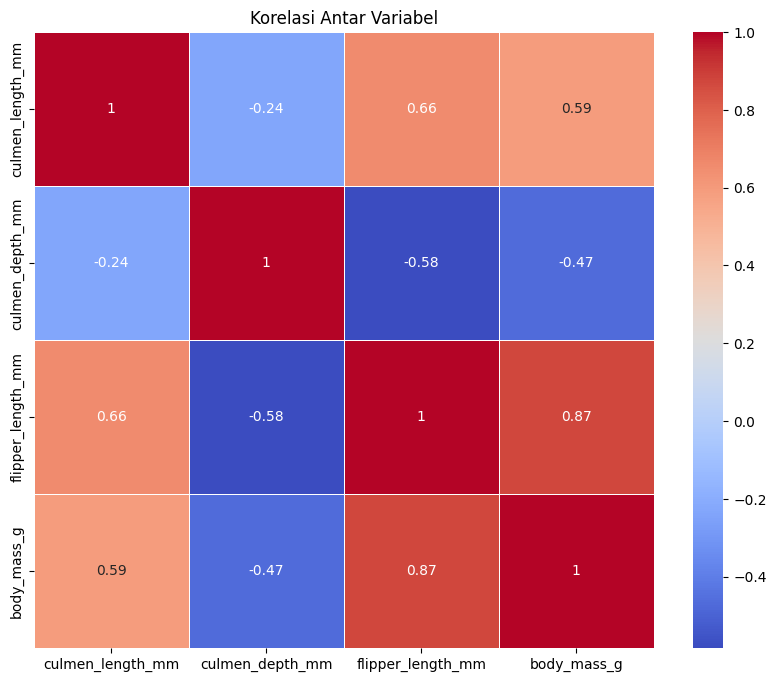

In [9]:
#Heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Variabel')
plt.show()

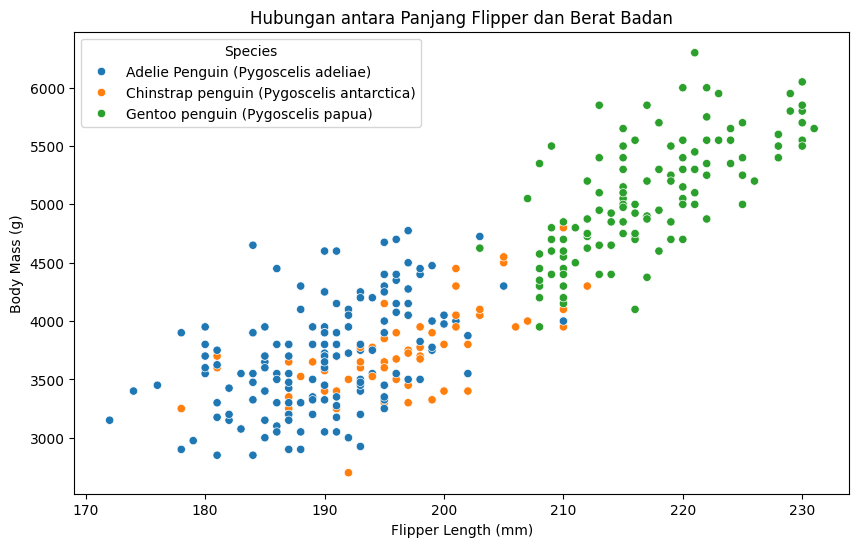

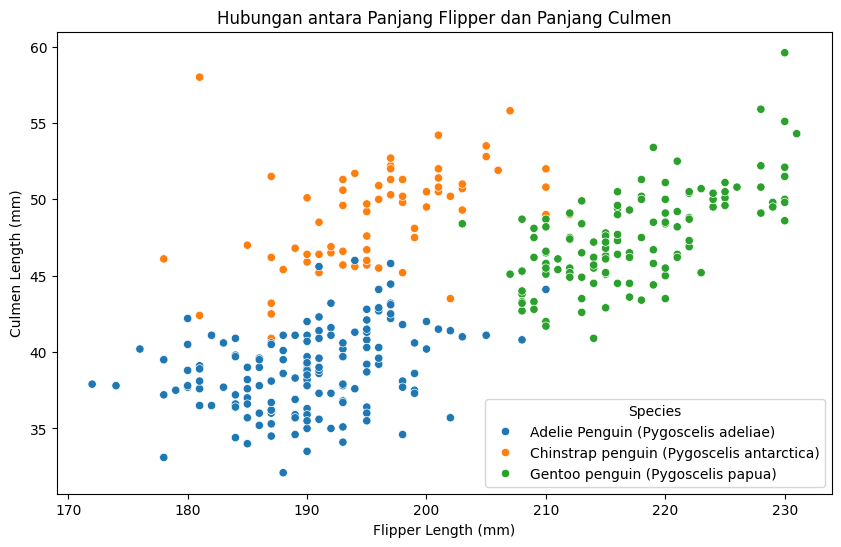

In [10]:
#Scatter plot untuk hubungan antara 'flipper_length_mm' dan 'body_mass_g'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Hubungan antara Panjang Flipper dan Berat Badan')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.show()

#Scatter plot untuk hubungan antara 'flipper_length_mm' dan 'culmen_length_mm'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='culmen_length_mm', hue='species')
plt.title('Hubungan antara Panjang Flipper dan Panjang Culmen')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Culmen Length (mm)')
plt.legend(title='Species')
plt.show()

In [11]:
# Menghitung rata-rata 'body_mass_g' untuk setiap spesies
average_body_mass_by_species = df.groupby('species')['body_mass_g'].mean()
print("\nRata-rata Berat Badan Berdasarkan Spesies:")
print(average_body_mass_by_species)

# Menghitung rata-rata 'culmen_length_mm' untuk setiap spesies
average_culmen_length_by_species = df.groupby('species')['culmen_length_mm'].mean()
print("\nRata-rata Panjang Paruh Berdasarkan Spesies:")
print(average_culmen_length_by_species)

# Menghitung rata-rata 'flipper_length_mm' untuk setiap spesies
average_flipper_length_by_species = df.groupby('species')['flipper_length_mm'].mean()
print("\nRata-rata Panjang Sirip Berdasarkan Spesies:")
average_flipper_length_by_species


Rata-rata Berat Badan Berdasarkan Spesies:
species
Adelie Penguin (Pygoscelis adeliae)          3702.960526
Chinstrap penguin (Pygoscelis antarctica)    3733.088235
Gentoo penguin (Pygoscelis papua)            5067.741935
Name: body_mass_g, dtype: float64

Rata-rata Panjang Paruh Berdasarkan Spesies:
species
Adelie Penguin (Pygoscelis adeliae)          38.828618
Chinstrap penguin (Pygoscelis antarctica)    48.833824
Gentoo penguin (Pygoscelis papua)            47.480242
Name: culmen_length_mm, dtype: float64

Rata-rata Panjang Sirip Berdasarkan Spesies:


,flipper_length_mm
species,
Adelie Penguin (Pygoscelis adeliae),190.000000
Chinstrap penguin (Pygoscelis antarctica),195.823529
Gentoo penguin (Pygoscelis papua),217.024194


In [12]:
#Menggunakan display widgets
# Function to predict species and display result
def predict_and_display(button):
  try:
    culmen_length = float(culmen_length_input.value)
    culmen_depth = float(culmen_depth_input.value)
    flipper_length = float(flipper_length_input.value)
    body_mass = float(body_mass_input.value)
    predicted_species = predict_species(culmen_length, culmen_depth, flipper_length, body_mass)
    result_label.value = f"Predicted species: {predicted_species}"
  except ValueError:
    result_label.value = "Please enter valid numerical values."

# Membuat masukan widgets
culmen_length_input = widgets.Text(description="Culmen Length (mm):")
culmen_depth_input = widgets.Text(description="Culmen Depth (mm):")
flipper_length_input = widgets.Text(description="Flipper Length (mm):")
body_mass_input = widgets.Text(description="Body Mass (g):")
predict_button = widgets.Button(description="Predict Species")
result_label = widgets.Label(value="")

# Display widgets
display(culmen_length_input, culmen_depth_input, flipper_length_input, body_mass_input, predict_button, result_label)

# tombol untuk prediction function
predict_button.on_click(predict_and_display)

Text(value='', description='Culmen Length (mm):')

Text(value='', description='Culmen Depth (mm):')

Text(value='', description='Flipper Length (mm):')

Text(value='', description='Body Mass (g):')

Button(description='Predict Species', style=ButtonStyle())

Label(value='')

In [13]:
# Convert 'species' column to numerical values using LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Convert 'island' column to numerical values using LabelEncoder
le_island = LabelEncoder()
df['island'] = le_island.fit_transform(df['island'])

# Convert 'sex' column to numerical values using LabelEncoder
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

# Now your DataFrame has numerical values for categorical columns
print(df.head())

   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       1              36.6             18.4              184.0   
1        0       1              39.8             19.1              184.0   
2        0       1              40.9             18.9              184.0   
3        1       1              46.5             17.9              192.0   
4        0       1              37.3             16.8              192.0   

   body_mass_g  sex  
0       3475.0    1  
1       4650.0    2  
2       3900.0    2  
3       3500.0    1  
4       3000.0    1  


In [20]:
# Pisahkan fitur (X) dan target (y)
X = df[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model-model klasifikasi
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),  # Support Vector Machine
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Latih dan evaluasi model-model
results = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy

# Tampilkan hasil akurasi model
print("Hasil Akurasi Model:")
for model_name, accuracy in results.items():
  print(f"{model_name}: {accuracy}")

# Pilih model terbaik berdasarkan akurasi
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nModel terbaik adalah {best_model_name} dengan akurasi {results[best_model_name]}")

# Simpan model terbaik
filename = 'penguin_species_model_yangdigunakan.sav'
pickle.dump(best_model, open(filename, 'wb'))

# Function to predict species and display result
def predict_species(culmen_length, culmen_depth, flipper_length, body_mass):
  input_data = np.array([[culmen_length, culmen_depth, flipper_length, body_mass]])
  predicted_species = best_model.predict(input_data)[0]
  return predicted_species

Hasil Akurasi Model:
Random Forest: 0.927536231884058
SVM: 0.6376811594202898
Decision Tree: 0.927536231884058
KNN: 0.6811594202898551

Model terbaik adalah Random Forest dengan akurasi 0.927536231884058


* **Spesies 0:** mewakili spesies **Adelie**.
* **Spesies 1:** mewakili spesies **Chinstrap**.
* **Spesies 2:** mewakili spesies **Gentoo**.

In [28]:
# Load the saved model
filename = '/content/penguin_species_model_yangdigunakan.sav'
loaded_model = pickle.load(open(filename, 'rb'))

culmen_length = 40  # Example value
flipper_length = 190 # Example value
body_mass = 4000  # Example value
new_data = [[culmen_length, flipper_length, body_mass]]
prediction = loaded_model.predict(new_data)
print("Predicted species:", prediction)

def predict_species(culmen_length, flipper_length, body_mass):
  input_data = np.array([[culmen_length, flipper_length, body_mass]])
  predicted_species = loaded_model.predict(input_data)[0]
  return predicted_species

Predicted species: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Load the saved model
filename = 'penguin_species_model_yangdigunakan.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#  have a new data file named 'new_penguin_data.csv'
new_data_path = '/content/data_pinguin_Tes.csv'

try:
    # Baca data baru dari file CSV
    new_df = pd.read_csv(new_data_path)

    # Persiapkan data baru untuk prediksi ('culmen_length_mm', 'flipper_length_mm', 'body_mass_g' ada)
    X_new = new_df[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g']]

    # Lakukan prediksi menggunakan model yang telah dilatih
    predictions = loaded_model.predict(X_new)

    # Buat DataFrame baru untuk menampilkan hasil prediksi dan aktual
    result_df = pd.DataFrame({
        'Spesies Aktual': new_df['species'],
        'Spesies Prediksi': predictions
    })

    # Tampilkan hasil prediksi
    print(result_df)

    # Evaluasi akurasi prediksi
    correct_predictions = (result_df['Spesies Aktual'] == result_df['Spesies Prediksi']).sum()
    incorrect_predictions = len(result_df) - correct_predictions


except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {new_data_path}. Periksa kembali path file.")

                               Spesies Aktual  Spesies Prediksi
0         Adelie Penguin (Pygoscelis adeliae)                 0
1         Adelie Penguin (Pygoscelis adeliae)                 0
2         Adelie Penguin (Pygoscelis adeliae)                 0
3   Chinstrap penguin (Pygoscelis antarctica)                 1
4         Adelie Penguin (Pygoscelis adeliae)                 0
5         Adelie Penguin (Pygoscelis adeliae)                 0
6   Chinstrap penguin (Pygoscelis antarctica)                 1
7   Chinstrap penguin (Pygoscelis antarctica)                 1
8   Chinstrap penguin (Pygoscelis antarctica)                 1
9         Adelie Penguin (Pygoscelis adeliae)                 0
10        Adelie Penguin (Pygoscelis adeliae)                 0
11        Adelie Penguin (Pygoscelis adeliae)                 0
12        Adelie Penguin (Pygoscelis adeliae)                 0
13  Chinstrap penguin (Pygoscelis antarctica)                 1
14        Adelie Penguin (Pygoscelis ade

In [25]:
# model ke numpy baru yang sudah di ckaler. pakai numpy data frame.
# Pisahkan fitur (X) dan target (y)
X = df[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g']].values  # Menggunakan .values untuk konversi ke NumPy array
y = df['species'].values  # Menggunakan .values untuk konversi ke NumPy array

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data latih
X_train = scaler.fit_transform(X_train)

# Transform data uji
X_test = scaler.transform(X_test)

# Inisialisasi model Random Forest
model = RandomForestClassifier()

# Latih model dengan data latih yang sudah di-scaled
model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy}")

Akurasi model: 0.927536231884058


In [26]:
# prompt: Inisialisasi StandardScaler, untuk pemasukan data yang baru. supaya datanya tidak salah klasifikasi

# ... (your existing code)

# Pisahkan fitur (X) dan target (y)
X = df[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df['species'].values

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler pada data latih dan transform data latih
X_train_scaled = scaler.fit_transform(X_train)

# Transform data uji menggunakan scaler yang sudah di-fit pada data latih
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Random Forest
model = RandomForestClassifier()

# Latih model dengan data latih yang sudah di-scaled
model.fit(X_train_scaled, y_train)

# Prediksi dengan data uji yang sudah di-scaled
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy}")

# Simpan scaler dan model
filename_scaler = 'penguin_scaler.sav'
pickle.dump(scaler, open(filename_scaler, 'wb'))

filename_model = 'penguin_model.sav'
pickle.dump(model, open(filename_model, 'wb'))

# Function to predict species and display result (Updated to use the scaler)
def predict_species(culmen_length, flipper_length, body_mass):
  # Load the scaler
  loaded_scaler = pickle.load(open(filename_scaler, 'rb'))

  # Load the model
  loaded_model = pickle.load(open(filename_model, 'rb'))

  input_data = np.array([[culmen_length, flipper_length, body_mass]])
  # Scale the input data using the loaded scaler
  input_data_scaled = loaded_scaler.transform(input_data)

  predicted_species = loaded_model.predict(input_data_scaled)[0]
  return predicted_species

# ... (your existing code)

Akurasi model: 0.9130434782608695


In [27]:
##aplikasi mini untuk prediksi
# Function to predict species and display result
def predict_species(culmen_length, flipper_length, body_mass):
  input_data = np.array([[culmen_length, flipper_length, body_mass]])
  predicted_species = loaded_model.predict(input_data)[0]
  return predicted_species

# Load the saved model
filename = 'penguin_species_model_yangdigunakan.sav'  # Replace with your model filename
loaded_model = pickle.load(open(filename, 'rb'))

# Create input widgets
culmen_length_input = widgets.FloatText(description="Culmen Length (mm):")
flipper_length_input = widgets.FloatText(description="Flipper Length (mm):")
body_mass_input = widgets.FloatText(description="Body Mass (g):")
predict_button = widgets.Button(description="Predict Species")
result_label = widgets.Label(value="")

# Display widgets
display(culmen_length_input, flipper_length_input, body_mass_input, predict_button, result_label)

# Function to handle button click
def on_button_clicked(b):
  clear_output()
  display(culmen_length_input, flipper_length_input, body_mass_input, predict_button, result_label)

  try:
    culmen_length = culmen_length_input.value
    flipper_length = flipper_length_input.value
    body_mass = body_mass_input.value

    if not culmen_length or not flipper_length or not body_mass:
      result_label.value = "Please enter all values."
      return

    predicted_species = predict_species(culmen_length, flipper_length, body_mass)
    result_label.value = f"Predicted species: {predicted_species}"

  except Exception as e:
    result_label.value = f"Error: {e}"

# Link button click to prediction function
predict_button.on_click(on_button_clicked)

FloatText(value=0.0, description='Culmen Length (mm):')

FloatText(value=0.0, description='Flipper Length (mm):')

FloatText(value=0.0, description='Body Mass (g):')

Button(description='Predict Species', style=ButtonStyle())

Label(value='')